## Data description:
   This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. 
    All excerpts are taken from field recordings.The files are pre-sorted into ten folds (folders named fold1-fold10) to help in the reproduction of and comparison with the automatic classification results.In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided.
    
 In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided.
## Audio Files Included:
   8732 audio files of urban sounds (see description above) in WAV format.
   
## Meta-Data Files Included:

### UrbanSound8k.csv

This file contains meta-data information about every audio file in the dataset. This includes:

* slice_file_name:
The name of the audio file. The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav, where:
[fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken
[classID] = a numeric identifier of the sound class (see description of classID below for further details)
[occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording
[sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence

* fsID:
The Freesound ID of the recording from which this excerpt (slice) is taken

* start
The start time of the slice in the original Freesound recording

* end:
The end time of slice in the original Freesound recording

* salience:
A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

* fold:
The fold number (1-10) to which this file has been allocated.

* classID:
A numeric identifier of the sound class:
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

* class:
The class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, 
siren, street_music.

# 1. Data Pre-processing and feature extraction:
## 1.1 Importing Data and Required Libraries:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
cd

/Users/stephen


In [10]:
cd users/

ValueError: No closing quotation

In [4]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'UrbanSound8K/metadata/UrbanSound8K.csv'

In [5]:
metadata.head(10)

NameError: name 'metadata' is not defined

In [6]:
### for checking whether the dataset is imbalanced
metadata['class'].value_counts()

NameError: name 'metadata' is not defined

In [7]:
plt.figure()
metadata['class'].value_counts().plot(kind='bar')
plt.show()

NameError: name 'metadata' is not defined

<Figure size 432x288 with 0 Axes>

In [8]:
#Describing the csv data
metadata.describe()

NameError: name 'metadata' is not defined

In [9]:
#showing metadata info
metadata.info()

NameError: name 'metadata' is not defined

In [63]:
#Checking the null values in data
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

## 1.2 Audio data Visualisation and Classification

In [64]:
### leats first read a audio sample using librosa
import librosa 
audio_file_path= 'UrbanSound8K/audio/fold1/108041-9-0-11.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [65]:
print(librosa_audio_data)

[ 0.05445824  0.00608439 -0.07376748 ... -0.18146151 -0.17582202
 -0.06336862]


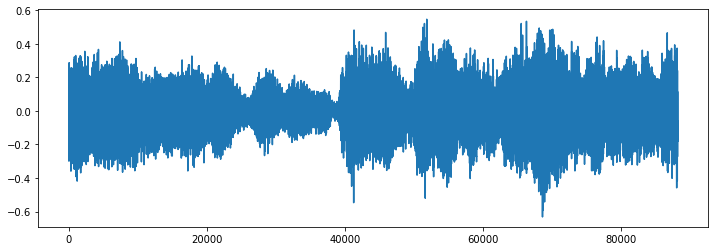

In [66]:
### lets plot the librosa audio data
import matplotlib.pyplot as plt
## original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

## 1.3 Observation on audio data
here Librosa converts the signel mono, that menas the chanel will always be one(1)

In [67]:
### lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [68]:
wave_audio

array([[ 3057,  2570],
       [ 1713,  1320],
       [  360,   -69],
       ...,
       [-4660, -2987],
       [-2785, -1060],
       [ -636,   889]], dtype=int16)

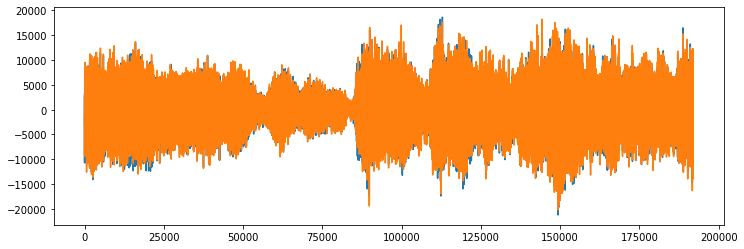

In [69]:
import matplotlib.pyplot as plt
# original with 2 channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

## 1.4 Extracting Features
here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audo sample. the MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characterisrics of the sound. thouse audio representations will allow us to identify features for classification. 

In [70]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [71]:
mfccs

array([[-70.569374 , -66.06355  , -66.87116  , ..., -70.16932  ,
        -63.131397 , -49.658844 ],
       [109.40361  , 103.18238  ,  90.91725  , ...,  92.53821  ,
         98.05109  ,  99.988625 ],
       [-44.19858  , -44.065002 , -42.88212  , ..., -52.047276 ,
        -50.74814  , -49.569626 ],
       ...,
       [ 10.833584 ,   9.490442 ,   5.022623 , ...,  -3.754396 ,
         -3.9581137,  -5.4938   ],
       [  1.315452 ,  -1.0455685,  -4.98162  , ...,   3.9217756,
          5.761237 ,   7.1517015],
       [ -6.546979 ,  -3.7478905,  -3.6173022, ...,  14.139425 ,
         14.097371 ,  11.17482  ]], dtype=float32)

In [72]:
### Extracting MFCC's for every audio file in the dadaset
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [73]:
###extracting features from audio
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [74]:
import numpy as np
from tqdm import tqdm
### now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients 
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [01:53, 30.77it/s]/home/msc1/anaconda3/envs/Env-7146COMP/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8324it [04:21, 40.64it/s]/home/msc1/anaconda3/envs/Env-7146COMP/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/home/msc1/anaconda3/envs/Env-7146COMP/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [04:32, 31.99it/s]


In [75]:
### converting extracted features to pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-215.79301, 71.66612, -131.81377, -52.091335,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265697,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


## 1.5 Splitting dataset as Trin and Test

In [76]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [77]:
X.shape

(8732, 40)

In [78]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [79]:
### Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#y=np.array(pd.get_dummies(y))
y=to_categorical(labelencoder.fit_transform(y))

In [80]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233374e+00, ...,
         8.6335993e-01,  6.4766794e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820307e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321607e+00]], dtype=float32)

In [83]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [84]:
#checking shape of x_train
X_train.shape

(6985, 40)

In [85]:
#checking shape of X_test
X_test.shape

(1747, 40)

In [86]:
#checking shape of y_train
y_train.shape

(6985, 10)

In [87]:
#checking shape of y_test
y_test.shape

(1747, 10)

# 2. Model Development and Trining 

In [88]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [90]:
### number of classes
num_labels=y.shape[1]

## 2.1 Configureing Network Architecture 

In [91]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###secound layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [92]:
#showing model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [93]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

## 2.2 Training Model & Saving moel in .h5 format

In [94]:
### Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

### I am using number epochs 100 and the number of batch size is 32. 
### why because to make training as speed as possible and aslo to improve the model acuracy level
num_epochs = 160
num_batch_size = 32
### saving model into .h5 model
checkpointer = ModelCheckpoint(filepath='UrbanSound8K/saved_models/audio_classification.h5',
                               verbase=1, saved_best_only=True)
start = datetime.now()

model_history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer],verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/160
6985/6985 [==============================] - 1s 83us/sample - loss: 11.6660 - accuracy: 0.1177 - val_loss: 2.2925 - val_accuracy: 0.1328
Epoch 2/160
6985/6985 [==============================] - 0s 40us/sample - loss: 2.5558 - accuracy: 0.1181 - val_loss: 2.2821 - val_accuracy: 0.1185
Epoch 3/160
6985/6985 [==============================] - 0s 40us/sample - loss: 2.3293 - accuracy: 0.1215 - val_loss: 2.2414 - val_accuracy: 0.1151
Epoch 4/160
6985/6985 [==============================] - 0s 39us/sample - loss: 2.2700 - accuracy: 0.1509 - val_loss: 2.1980 - val_accuracy: 0.1723
Epoch 5/160
6985/6985 [==============================] - 0s 39us/sample - loss: 2.2118 - accuracy: 0.1768 - val_loss: 2.0799 - val_accuracy: 0.2370
Epoch 6/160
6985/6985 [==============================] - 0s 39us/sample - loss: 2.1426 - accuracy: 0.1956 - val_loss: 2.0334 - val_accuracy: 0.2461
Epoch 7/160
6985/6985 [==============================] - 0s 40u

#### The number of Epoch are i choon is 160 and the batch size is 32. and 160 Epoch are fit very well in to the model layer and  it stopped at minimum val loss is 0.6869, the val accuracy is also at maximum of 0.7985 

# 3. Model evaluation and deployment

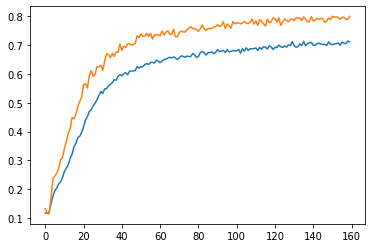

In [95]:
#ploting trining acuracy and val accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.show()

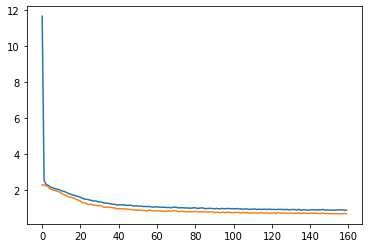

In [96]:
#ploting loos and vall loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.show()

In [97]:
#showing test accuracy
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.79851174


In [98]:
X_test[1]

array([-466.1843    ,    1.5388287 ,  -34.397358  ,   35.715336  ,
        -15.16693   ,  -18.850813  ,   -0.74158   ,  -15.999888  ,
        -21.354332  ,    7.650683  ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336626  ,    0.9169518 ,  -18.795404  ,   -5.0017214 ,
         -0.70152694,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.6552978 ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419799  ,   -0.5791614 ,
         -1.2440345 ,   17.722294  ,   13.837573  ,   -5.1643486 ],
      dtype=float32)

# 3.1 the confusion matrix, sensitivity, specificity, loss and AUC values

In [99]:
y_pred = model.predict(X_test)

In [100]:
y_pred = y_pred.round()

In [101]:
y_pred[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [102]:
# now finding the matrics accuracy score
y_test_arg = np.argmax(y_test,axis=1)
y_pred_arg = np.argmax(y_pred,axis=1)
print(y_test_arg)
metrics.accuracy_score(y_test_arg,y_pred_arg)

[5 1 4 ... 1 2 2]


0.6868918145392101

In [103]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80       195
           1       0.98      0.70      0.82        91
           2       0.78      0.52      0.62       205
           3       0.94      0.59      0.73       182
           4       0.94      0.72      0.81       202
           5       0.98      0.74      0.84       216
           6       0.98      0.49      0.66        87
           7       0.92      0.84      0.88       187
           8       0.99      0.81      0.89       199
           9       0.85      0.34      0.48       183

   micro avg       0.93      0.65      0.77      1747
   macro avg       0.93      0.64      0.75      1747
weighted avg       0.93      0.65      0.76      1747
 samples avg       0.65      0.65      0.65      1747



/home/msc1/anaconda3/envs/Env-7146COMP/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3.2 Developing a jupyter Notebook to perform inference on .h5 model for new test audio

### Testting Some Test Audio Data
seps
* Preprocess the new data
* Predict the classes
* invere transform your Predicted Label

In [104]:
### Testing audio sample file one(1)
filename1="UrbanSound8K/audio/fold10/99192-4-0-20.wav"
audio, sample_rate = librosa.load(filename1, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class


[-86.56164     71.021935   -16.70908    -12.73116    -21.277279
 -11.70182    -40.32187      7.495675   -32.471687    17.603764
 -35.448605     6.745683   -24.428188     3.080445   -24.399378
   2.315142   -19.134079     8.197778   -17.643654    -2.6600943
  -8.037294    -0.89423764  -6.467487    -4.823225    -7.31632
  -4.5453725   -3.6125622    0.32580596  -6.7860136    4.097992
  -9.656933     0.48037553  -7.5807414   -0.6067187   -5.22846
   0.70499974  -1.7945498   -0.8034937   -1.4753984   -2.647243  ]
[[-86.56164     71.021935   -16.70908    -12.73116    -21.277279
  -11.70182    -40.32187      7.495675   -32.471687    17.603764
  -35.448605     6.745683   -24.428188     3.080445   -24.399378
    2.315142   -19.134079     8.197778   -17.643654    -2.6600943
   -8.037294    -0.89423764  -6.467487    -4.823225    -7.31632
   -4.5453725   -3.6125622    0.32580596  -6.7860136    4.097992
   -9.656933     0.48037553  -7.5807414   -0.6067187   -5.22846
    0.70499974  -1.7945498   -0.

array(['drilling'], dtype='<U16')

In [105]:
### Testing audio sample file two(2)
filename2="UrbanSound8K/audio/fold1/97317-2-0-36.wav"
audio, sample_rate = librosa.load(filename2, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-180.29268      74.46635    -110.9823        6.445004    -22.7378
   14.479283      1.7349188     5.077757     -5.9446135     7.6199255
  -13.295024      1.8014879    11.238079     15.22816      -4.186907
    4.4021807    -8.975373      3.4068897     0.74683076    3.5692976
    6.8964534    -3.425165     -3.6273112     0.59069383    1.8963321
    0.18930927   -5.7662983     3.5929997     8.202865     -2.1763737
   -4.1959534    -4.024855      4.7807302    -1.3794553    -1.6290661
    3.1349046    -4.243383     -4.5426617     4.808754      3.0648024 ]
[[-180.29268      74.46635    -110.9823        6.445004    -22.7378
    14.479283      1.7349188     5.077757     -5.9446135     7.6199255
   -13.295024      1.8014879    11.238079     15.22816      -4.186907
     4.4021807    -8.975373      3.4068897     0.74683076    3.5692976
     6.8964534    -3.425165     -3.6273112     0.59069383    1.8963321
     0.18930927   -5.7662983     3.5929997     8.202865     -2.1763737
    -4.1959534    -4

array(['children_playing'], dtype='<U16')

In [106]:
### Testing audio sample file three (3)
filename3="UrbanSound8K/audio/fold3/116400-3-1-1.wav"
audio, sample_rate = librosa.load(filename3, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class


[-4.47373840e+02  1.01257805e+02  1.39749837e+00 -2.36698580e+00
  6.56241655e+00  9.44792652e+00 -5.99812746e+00  4.18221760e+00
 -6.91219628e-01  8.11826134e+00  1.65543473e+00  3.99915433e+00
  7.41437244e+00  8.86341000e+00  3.78104424e+00  6.02096200e-01
 -1.03351223e+00  7.10739136e-01 -3.23780107e+00 -2.11256957e+00
 -3.04447842e+00  1.22658873e+00  1.39390039e+00  1.34730816e+00
  2.54829693e+00  1.54212046e+00  2.96565580e+00  1.30668926e+00
  1.17478871e+00 -2.54965854e+00  2.76196927e-01  7.23825574e-01
  2.80819988e+00  2.01293635e+00  2.26064277e+00  3.10982656e+00
  1.22280252e+00  1.96916139e+00  1.62831712e+00  3.79091084e-01]
[[-4.47373840e+02  1.01257805e+02  1.39749837e+00 -2.36698580e+00
   6.56241655e+00  9.44792652e+00 -5.99812746e+00  4.18221760e+00
  -6.91219628e-01  8.11826134e+00  1.65543473e+00  3.99915433e+00
   7.41437244e+00  8.86341000e+00  3.78104424e+00  6.02096200e-01
  -1.03351223e+00  7.10739136e-01 -3.23780107e+00 -2.11256957e+00
  -3.04447842e+00  

array(['dog_bark'], dtype='<U16')

## 3.3 Conclusion
the given audio and csv data was preprocessed and studies well by using librosa tools, after i created a model using librosa and MFCC to train and test the audio files and the model was saved in saved_models folder. 
* I used the librosa and MFCC to understand the audio frequencys and also to convert audio data in to a digital data
* this model need some more further improvements for deployment
* I tested three different unknow files to chek that weather model is working or not
* the saved .h5 model is workimg very well and i got the predictions class for all tested files, and in thouse max are true predictions.
           
 Final saved model was tested by  three different new test audio files and the model got nearly 80% accuracy so the pridictions made by the model has huge chance for right, but also 20% chance their for wrong predictions based on the result accuracy we got.so this  model need some more further study to get better results

#### now the final model is ready to detect the differet sounds related to the crime and antisocial behaviour, and it can identify the spcific sounds recorded by the Microphone it can help crime control deportment to control the crime damage or total crime ASAP by the help of this model. the task was given by Home Office was done.